# SC1015 Mini-Project
---

### Essential Libraries

Let us begin by importing the essential libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Stage 1: Data Preparation
---
Import both the train and test data for the first stage which is data preparation

In [2]:
train_data = pd.read_csv('archive/train.csv')
test_data = pd.read_csv('archive/test.csv')

In [3]:
train_data_new = pd.concat([train_data, test_data], ignore_index=True)
train_data = train_data_new

### Description of the dataset from Kaggle 
---
https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones
#### Attribute information
For each record in the dataset the following is provided:

Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.

Triaxial Angular velocity from the gyroscope.

A 561-feature vector with time and frequency domain variables.

Its activity label.

An identifier of the subject who carried out the experiment.

In [4]:
print("Data type : ", type(train_data))
print("Data dims : ", train_data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (10299, 563)


In [1087]:
train_data.dtypes

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object

As we can see, the above data contains 10299 rows and 563 columns, which means that we have a problem of overfitting due to too many records, and a problem of not being able to predict activity clearly due to the use of many variables. We will prepare the data by cutting down the variables that are irrelevant, not so useful, and focus on the key ones.

In [5]:
train_data['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

For our predictor, which is 'Activity', a categorical variable, we have the following possible values:
WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING

Since we are focused more towards the prediction of sedentary activities and to motivate the user to walk around and stretch for a while and stand up at times as well, we will remove 'WALKING_UPSTAIRS' and 'WALKING_DOWNSTAIRS' from the dataset to make it more cleaner, which will allows us to work with lesser records, reducing the problem of overfitting.<br>
<br>
Moreover, we would want to remove 'LAYING' activity as well, as it could mean that the user could be sleeping, and that we wouldn't want to disturb the user's sleep by triggering them to either stand up or/and go for a walk. Thus, we focus on the key activities of 'STANDING', 'SITTING' and and 'WALKING' that will help us to solve our problem statement effectively.

In [6]:
# Dropping the activities 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', and 'LAYING'
train_data = train_data.loc[(train_data['Activity'] != 'WALKING_UPSTAIRS') & 
                            (train_data['Activity'] != 'WALKING_DOWNSTAIRS') &
                            (train_data['Activity'] != 'LAYING')]

After dropping the values, let us check the remaining Activities in the train dataset

In [7]:
train_data['Activity'].unique()

array(['STANDING', 'SITTING', 'WALKING'], dtype=object)

Let us check the data dimension of the train data now

In [8]:
print("Data dims : ", train_data.shape)

Data dims :  (5405, 563)


We can still remove subject, because it just represents the ID of participants and is not relevant in our analysis

In [9]:
train_data = train_data[train_data.columns.drop('subject')]

# Check the new dimensions of train and test data
print("Data dims of train data : ", train_data.shape)

Data dims of train data :  (5405, 562)


We have significantly reduced our training data by roughly 5000+ records, which is a good sign as we won't need to worry so much about overfitting our training data. Let us now remove other columns that may be not so relevant to our training and test data

Before removing the columns, let us look at a particular set of columns which have the following signals:<br>
tBodyAcc-XYZ<br>
tGravityAcc-XYZ<br>
tBodyAccJerk-XYZ<br>
tBodyGyro-XYZ<br>
tBodyGyroJerk-XYZ<br>
tBodyAccMag<br>
tGravityAccMag<br>
tBodyAccJerkMag<br>
tBodyGyroMag<br>
tBodyGyroJerkMag<br>
fBodyAcc-XYZ<br>
fBodyAccJerk-XYZ<br>
fBodyGyro-XYZ<br>
fBodyAccMag<br>
fBodyAccJerkMag<br>
fBodyGyroMag<br>
fBodyGyroJerkMag<br>
<br>
For each of these signals, the following variables were estimated:<br>
mean(): Mean value<br>
std(): Standard deviation<br>
mad(): Median absolute deviation<br> 
max(): Largest value in array<br>
min(): Smallest value in array<br>
sma(): Signal magnitude area<br>
energy(): Energy measure. Sum of the squares divided by the number of values.<br>
iqr(): Interquartile range<br>
entropy(): Signal entropy<br>
arCoeff(): Autorregresion coefficients with Burg order equal to 4<br>
correlation(): correlation coefficient between two signals<br>
maxInds(): index of the frequency component with largest magnitude<br>
meanFreq(): Weighted average of the frequency components to obtain a mean frequency<br>
skewness(): skewness of the frequency domain signal<br>
kurtosis(): kurtosis of the frequency domain signal<br>
bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window.<br>
angle(): Angle between to vectors.<br>
<br>
Note that for the signals with 'XYZ', each of the components were measured separately, which is the 'X', 'Y' and 'Z' axis.<br>
<br>
The column name is therefore made up of the signal, the axis if there is one, and the variable. So for example the column name of 'tBodyAcc-mean()-X' means that the tBodyAcc-X values was recorded, and based on the recorded values, the 'mean()' was taken, to compute the values in the column (so in other words the mean() of the recordings from the tBodyAcc-X signal were computed for the particular individual, data which was obtained from the smartphone sensor).<br>
<br>
Based on the variables that were estimated, we came up with certain variables that wouldn't be so useful in our predictions, which are std(), mad(), max(), min(), iqr(), angle(), arCoeff(), maxInds(), meanFreq(), skewness(), kurtosis(), bandsEnergy(), angle(), after consideration and evaluation of what each variable represents and its relevancy.<br>
<br>
Therefore, we have to remove the column names that consist of the following variable strings such as 'std()', 'mad()', and so on, mentioned above. 

In [10]:
#Removing the irrelevant, not so important columns, that wouldn't help us in answering the problem statement clearly
remove = train_data.filter(regex='std|mad|max|min|iqr|arCoeff|maxInds|meanFreq|skewness|kurtosis|bandsEnergy|angle')
remove

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,-0.576159,-0.829711,0.843609,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,-0.569174,-0.824705,0.849095,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,-0.483303,-0.130209,-0.305842,-0.488393,-0.181297,-0.301262,-0.392891,-0.210774,-0.409107,0.402178,...,0.258333,0.398469,0.199377,0.365598,0.076656,0.374991,-0.145443,-0.817014,0.172039,0.125107
10237,-0.510188,-0.111773,-0.322375,-0.507802,-0.182804,-0.320156,-0.463048,-0.210774,-0.425661,0.402178,...,-0.100881,0.147958,-0.187534,0.947383,-0.338707,-0.806335,0.352414,-0.822527,0.170455,0.121438
10238,-0.593275,-0.124444,-0.427655,-0.614110,-0.196080,-0.430790,-0.508640,-0.220891,-0.425661,0.457286,...,-0.316644,-0.161822,-0.576973,0.211248,-0.708733,0.271323,-0.529599,-0.819168,0.175519,0.120376
10239,-0.594104,-0.093302,-0.441025,-0.626089,-0.136955,-0.424460,-0.514281,-0.035991,-0.463586,0.311028,...,-0.014779,0.007677,-0.313433,0.071932,-0.594592,0.482462,0.103639,-0.809132,0.180466,0.125399


As we have filtered out the columns that have the variables mentioned above, we see that we can remove 430 columns, after which we should be left with much fewer columns to work with. Let's go ahead and remove these columns

In [11]:
# Using new_data as a temporary dataframe to store the updated train_data and reassigning it to train_data
new_data = train_data[train_data.columns.drop(list(remove.columns))]
train_data = new_data

In [12]:
train_data #Display the columns after removing the variables mentioned above

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,...,fBodyBodyAccJerkMag-entropy(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-entropy(),Activity
0,0.288585,-0.020294,-0.132905,-0.965523,-0.999945,-0.999863,-0.994612,-0.407747,-0.679338,-0.602122,...,-1.000000,-0.980135,-0.980135,-0.999240,-0.701291,-0.991990,-0.991990,-0.999937,-0.871306,STANDING
1,0.278419,-0.016411,-0.123520,-0.981930,-0.999991,-0.999788,-0.998405,-0.714892,-0.500930,-0.570979,...,-1.000000,-0.988296,-0.988296,-0.999811,-0.720683,-0.995854,-0.995854,-0.999981,-1.000000,STANDING
2,0.279653,-0.019467,-0.113462,-0.983478,-0.999969,-0.999660,-0.999470,-0.592235,-0.485821,-0.570979,...,-1.000000,-0.989255,-0.989255,-0.999854,-0.736521,-0.995031,-0.995031,-0.999973,-1.000000,STANDING
3,0.279174,-0.026201,-0.123283,-0.986093,-0.999976,-0.999736,-0.999504,-0.627446,-0.850930,-0.911872,...,-1.000000,-0.989413,-0.989413,-0.999876,-0.720891,-0.995221,-0.995221,-0.999974,-0.955696,STANDING
4,0.276629,-0.016570,-0.115362,-0.992653,-0.999991,-0.999856,-0.999757,-0.786553,-0.559477,-0.761434,...,-1.000000,-0.991433,-0.991433,-0.999902,-0.763372,-0.995093,-0.995093,-0.999974,-1.000000,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0.259172,-0.008408,-0.083012,-0.288861,-0.865142,-0.853078,-0.780016,0.428666,0.348899,0.226846,...,0.117679,-0.504060,-0.504060,-0.904538,0.560172,-0.496371,-0.496371,-0.854893,0.511331,WALKING
10237,0.248799,-0.015695,-0.103801,-0.308416,-0.878595,-0.846996,-0.791005,0.498005,0.290787,0.148364,...,0.280058,-0.497118,-0.497118,-0.903063,0.566064,-0.484915,-0.484915,-0.834259,0.449773,WALKING
10238,0.247290,-0.024840,-0.141388,-0.402794,-0.915921,-0.851179,-0.848014,0.369089,0.305103,0.045216,...,0.260311,-0.430240,-0.430240,-0.797449,0.560419,-0.545979,-0.545979,-0.870757,0.461767,WALKING
10239,0.277149,0.003709,-0.113742,-0.386584,-0.916443,-0.839859,-0.856337,0.428666,0.455610,0.133529,...,0.021418,-0.481881,-0.481881,-0.814499,0.526121,-0.648557,-0.648557,-0.934085,0.327452,WALKING


Let us check the dimension of the train_data now

In [13]:
print("Data dims : ", train_data.shape)

Data dims :  (5405, 132)


---
Let us revisit and focus on the signals from earlier:<br>
tBodyAcc-XYZ<br>
tGravityAcc-XYZ<br>
tBodyAccJerk-XYZ<br>
tBodyGyro-XYZ<br>
tBodyGyroJerk-XYZ<br>
tBodyAccMag<br>
tGravityAccMag<br>
tBodyAccJerkMag<br>
tBodyGyroMag<br>
tBodyGyroJerkMag<br>
fBodyAcc-XYZ<br>
fBodyAccJerk-XYZ<br>
fBodyGyro-XYZ<br>
fBodyAccMag<br>
fBodyAccJerkMag<br>
fBodyGyroMag<br>
fBodyGyroJerkMag<br>
<br>
Based on our principal judgement and analysis, we decided that the signals with postfix of 'Mag' will not be very useful nor informative as their 'X', 'Y' and 'Z' components since the 'Mag' only captures the magnitude and not the direction of the motion. So in summary, we can further remove the column names that have 'Mag', so let us do this now for the train_data.

Let us get the list of columns to be removed, and then use this list to remove the columns in the train_data.

In [14]:
to_remove = train_data.filter(regex='Mag')
list(to_remove.columns) #The columns to be removed

['tBodyAccMag-mean()',
 'tBodyAccMag-sma()',
 'tBodyAccMag-energy()',
 'tBodyAccMag-entropy()',
 'tGravityAccMag-mean()',
 'tGravityAccMag-sma()',
 'tGravityAccMag-energy()',
 'tGravityAccMag-entropy()',
 'tBodyAccJerkMag-mean()',
 'tBodyAccJerkMag-sma()',
 'tBodyAccJerkMag-energy()',
 'tBodyAccJerkMag-entropy()',
 'tBodyGyroMag-mean()',
 'tBodyGyroMag-sma()',
 'tBodyGyroMag-energy()',
 'tBodyGyroMag-entropy()',
 'tBodyGyroJerkMag-mean()',
 'tBodyGyroJerkMag-sma()',
 'tBodyGyroJerkMag-energy()',
 'tBodyGyroJerkMag-entropy()',
 'fBodyAccMag-mean()',
 'fBodyAccMag-sma()',
 'fBodyAccMag-energy()',
 'fBodyAccMag-entropy()',
 'fBodyBodyAccJerkMag-mean()',
 'fBodyBodyAccJerkMag-sma()',
 'fBodyBodyAccJerkMag-energy()',
 'fBodyBodyAccJerkMag-entropy()',
 'fBodyBodyGyroMag-mean()',
 'fBodyBodyGyroMag-sma()',
 'fBodyBodyGyroMag-energy()',
 'fBodyBodyGyroMag-entropy()',
 'fBodyBodyGyroJerkMag-mean()',
 'fBodyBodyGyroJerkMag-sma()',
 'fBodyBodyGyroJerkMag-energy()',
 'fBodyBodyGyroJerkMag-entropy(

In [15]:
# Dropping the columns to be removed from the train_data
train_data = train_data[train_data.columns.drop(list(to_remove.columns))]

In [16]:
train_data #Display columns after removing the signals/variables mentioned above

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,...,fBodyGyro-mean()-Y,fBodyGyro-mean()-Z,fBodyGyro-sma(),fBodyGyro-energy()-X,fBodyGyro-energy()-Y,fBodyGyro-energy()-Z,fBodyGyro-entropy()-X,fBodyGyro-entropy()-Y,fBodyGyro-entropy()-Z,Activity
0,0.288585,-0.020294,-0.132905,-0.965523,-0.999945,-0.999863,-0.994612,-0.407747,-0.679338,-0.602122,...,-0.981762,-0.989515,-0.985276,-0.999864,-0.999666,-0.999935,-0.712402,-0.644842,-0.838993,STANDING
1,0.278419,-0.016411,-0.123520,-0.981930,-0.999991,-0.999788,-0.998405,-0.714892,-0.500930,-0.570979,...,-0.992530,-0.989606,-0.986869,-0.999825,-0.999911,-0.999892,-0.611112,-0.764603,-0.751080,STANDING
2,0.279653,-0.019467,-0.113462,-0.983478,-0.999969,-0.999660,-0.999470,-0.592235,-0.485821,-0.570979,...,-0.993715,-0.986756,-0.986009,-0.999673,-0.999962,-0.999846,-0.590987,-0.808287,-0.751080,STANDING
3,0.279174,-0.026201,-0.123283,-0.986093,-0.999976,-0.999736,-0.999504,-0.627446,-0.850930,-0.911872,...,-0.993602,-0.987191,-0.990344,-0.999946,-0.999951,-0.999867,-0.723666,-0.803754,-0.817286,STANDING
4,0.276629,-0.016570,-0.115362,-0.992653,-0.999991,-0.999856,-0.999757,-0.786553,-0.559477,-0.761434,...,-0.992984,-0.988666,-0.988706,-0.999862,-0.999951,-0.999864,-0.652617,-0.827212,-0.737458,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0.259172,-0.008408,-0.083012,-0.288861,-0.865142,-0.853078,-0.780016,0.428666,0.348899,0.226846,...,-0.407356,-0.307518,-0.367514,-0.916518,-0.827203,-0.798141,0.473195,0.610012,0.460033,WALKING
10237,0.248799,-0.015695,-0.103801,-0.308416,-0.878595,-0.846996,-0.791005,0.498005,0.290787,0.148364,...,-0.416607,-0.362283,-0.362789,-0.904444,-0.822877,-0.813441,0.645402,0.639393,0.369306,WALKING
10238,0.247290,-0.024840,-0.141388,-0.402794,-0.915921,-0.851179,-0.848014,0.369089,0.305103,0.045216,...,-0.503644,-0.337474,-0.329265,-0.768846,-0.880067,-0.769610,0.663292,0.550368,0.470050,WALKING
10239,0.277149,0.003709,-0.113742,-0.386584,-0.916443,-0.839859,-0.856337,0.428666,0.455610,0.133529,...,-0.568970,-0.344654,-0.391327,-0.754023,-0.912781,-0.753343,0.537202,0.525846,0.426761,WALKING


Let us check the dimension of the train data

In [17]:
# Check the dimensions of train and test data
print("Data dims of train data : ", train_data.shape)

Data dims of train data :  (5405, 96)


As we can see, we have significantly reduced the number of predictor variables in our data preparation stage, from the 561-feature vector, and a feature that represented the subject_id which is irrelevant in the prediction, and the response variable which is the variable to be predicted, to a 95-feature vector with the last variable, which is the 96th variable, being the response variable which is to be predicted in our problem statement

Before we move on to the exploratory data analysis stage, let us have a look at all our predictor variables and the response variable, which are all non-null (hence don't require further data preparation), and are of type float64, except for the response variable, namely 'Activity', which is a categorical variable. So this tells us that we are looking at a classfication problem statement where we require to predict the classes of 'Activity', the 3 classes mentioned earlier ('STANDING', 'SITTING', 'WALKING'), in an accurate manner.

In [18]:
# A summary of the finalized predictor variables and response variable for our problem statement
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5405 entries, 0 to 10240
Data columns (total 96 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tBodyAcc-mean()-X                5405 non-null   float64
 1   tBodyAcc-mean()-Y                5405 non-null   float64
 2   tBodyAcc-mean()-Z                5405 non-null   float64
 3   tBodyAcc-sma()                   5405 non-null   float64
 4   tBodyAcc-energy()-X              5405 non-null   float64
 5   tBodyAcc-energy()-Y              5405 non-null   float64
 6   tBodyAcc-energy()-Z              5405 non-null   float64
 7   tBodyAcc-entropy()-X             5405 non-null   float64
 8   tBodyAcc-entropy()-Y             5405 non-null   float64
 9   tBodyAcc-entropy()-Z             5405 non-null   float64
 10  tBodyAcc-correlation()-X,Y       5405 non-null   float64
 11  tBodyAcc-correlation()-X,Z       5405 non-null   float64
 12  tBodyAcc-correlatio

## Stage 2: Exploratory Data Analysis
---
Use different kinds of plots and visualization methods to filter out the variables that can best predict the activity.<br>
<br>We will consider use of sophisticated techniques under Exploratory Data Analysis as our finalized dataset has too many predictor variables. While arguably we could remove and drop more columns from the train data to further reduce the number of predictor variables, the downside would be that we could lose valuable and potential information that could help us to solve our problem statement accurately. This is because of the nature of our problem, that requires the use of signal readings to predict what activity the person is currently doing. As a result, readings from the important sensors will definitely help in the solution of the problem statement.

### Let us look at the different types of activities present in the dataset and their counts

Number of Primary Types : 3
STANDING    1906
SITTING     1777
WALKING     1722
Name: Activity, dtype: int64


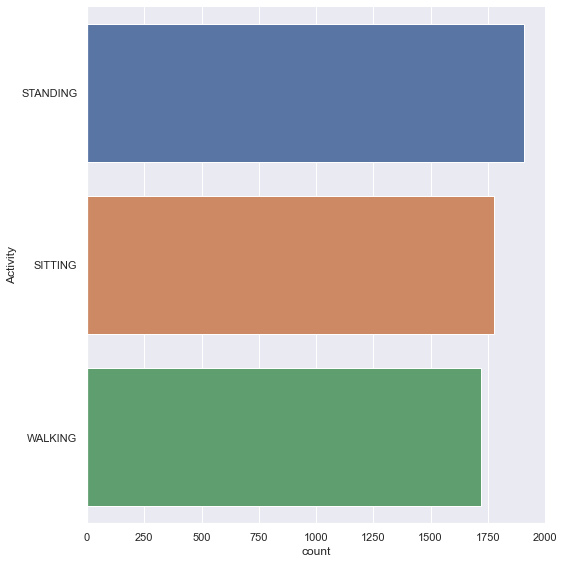

In [20]:
# Activity Types in the Dataset
print("Number of Primary Types :", len(train_data["Activity"].unique()))

# Pokemons of each Primary Type
print(train_data["Activity"].value_counts())
sb.catplot(y = "Activity", data = train_data, kind = "count", height = 8)

As we can see from above, the data for number of standing, sitting, laying, and walking activities is evenly spread out, which is good for us as this can help to avoid overfitting, because if there was too many data for one activity, then it could be possible that our model could overfit that particular activity and incorrectly predict that activity

### Let us try to do boxplots on individual signal readings and their variables, to see if we can gain any information

---
From our remaining data, we have the following signals:<br>
tBodyAcc<br>
tGravityAcc<br>
tBodyAccJerk<br>
tBodyGyro<br>
tBodyGyroJerk<br>
fBodyAcc<br>
fBodyAccJerk<br>
fBodyGyro<br>
<br>
And we have the following variables which were computed on each signal:<br>
mean()-X, mean()-Y<br>
sma()<br>
energy()-X, energy()-Y<br>
entropy()-X, entropy()-Y,<br>
correlation()-X,Y --> This was computed only on signals prefixed with a 't'<br>
<br>
We have to do boxplots by taking a particular signal, and do it on all the computed variables to see which signal+variable is able to best predict activity based on the boxplots. We can then repeat the process on other signals and make use of other visualization features such as correlation heatmap to get more information

We will compute the boxplots for the tBodyAcc:

<AxesSubplot:xlabel='Activity', ylabel='tBodyAcc-correlation()-X,Y'>

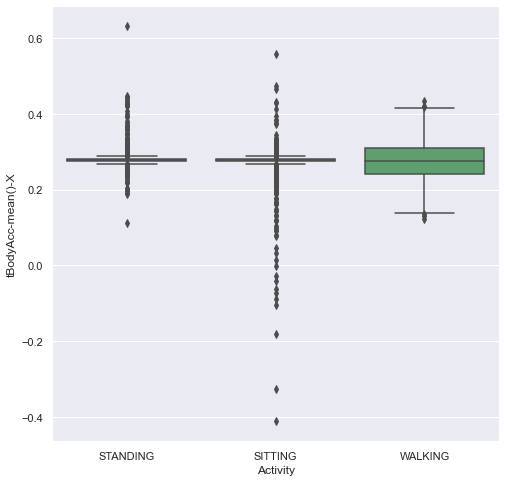

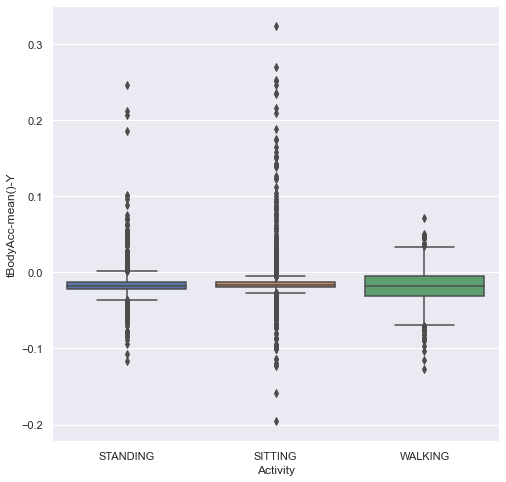

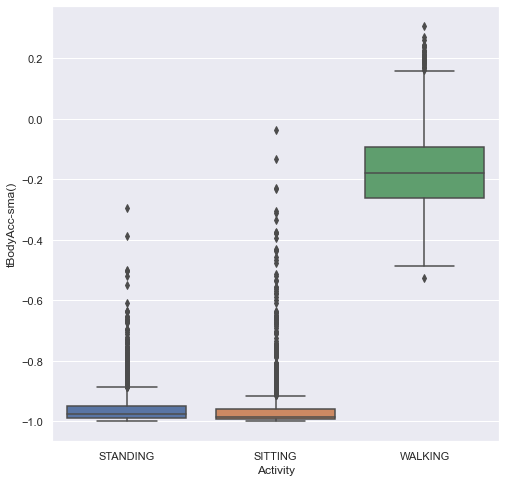

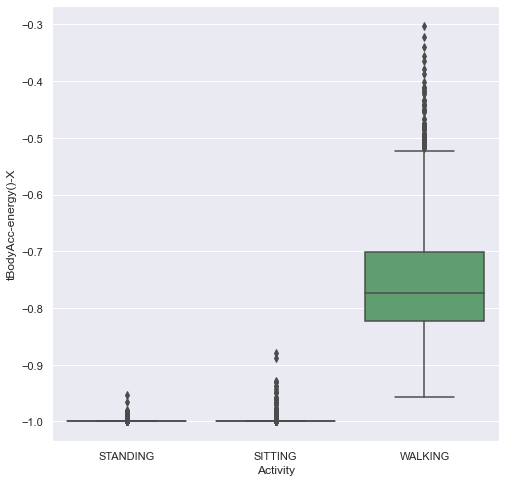

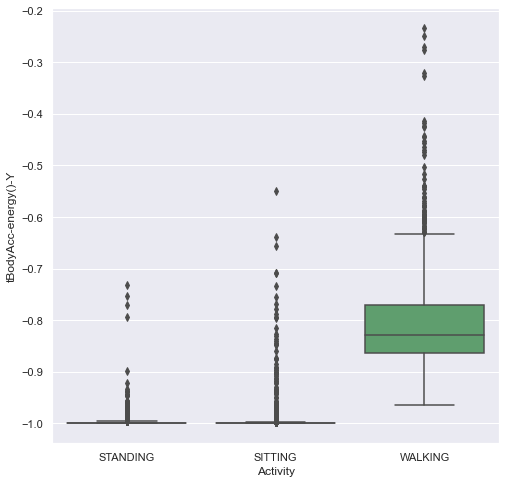

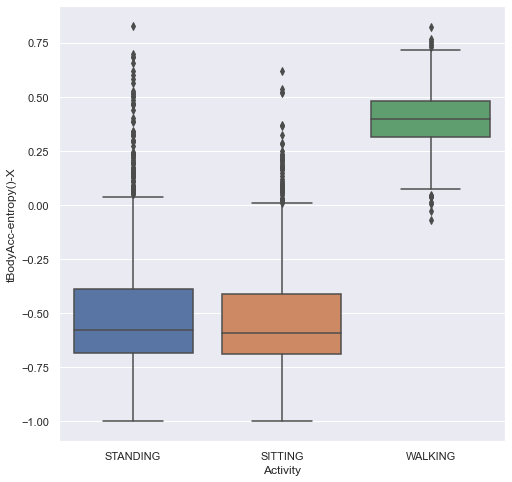

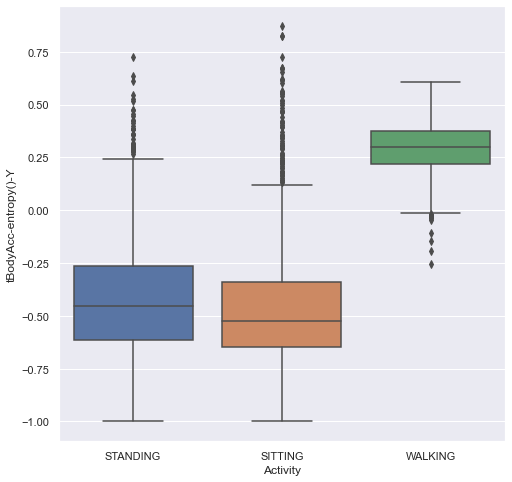

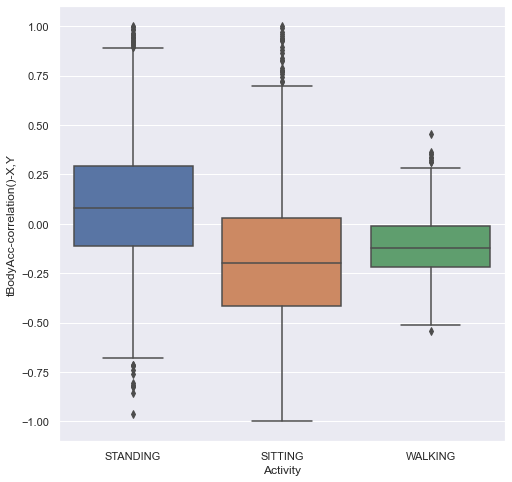

In [21]:
f = plt.figure(figsize = (8,8))
sb.boxplot(data=train_data, x='Activity', y='tBodyAcc-mean()-X')
f = plt.figure(figsize = (8,8))
sb.boxplot(data=train_data, x='Activity', y='tBodyAcc-mean()-Y')
f = plt.figure(figsize = (8,8))
sb.boxplot(data=train_data, x='Activity', y='tBodyAcc-sma()')
f = plt.figure(figsize = (8,8))
sb.boxplot(data=train_data, x='Activity', y='tBodyAcc-energy()-X')
f = plt.figure(figsize = (8,8))
sb.boxplot(data=train_data, x='Activity', y='tBodyAcc-energy()-Y')
f = plt.figure(figsize = (8,8))
sb.boxplot(data=train_data, x='Activity', y='tBodyAcc-entropy()-X')
f = plt.figure(figsize = (8,8))
sb.boxplot(data=train_data, x='Activity', y='tBodyAcc-entropy()-Y')
f = plt.figure(figsize = (8,8))
sb.boxplot(data=train_data, x='Activity', y='tBodyAcc-correlation()-X,Y')

We will compute the boxplots for the tBodyAccJerk:

<AxesSubplot:xlabel='Activity', ylabel='tBodyAccJerk-correlation()-X,Y'>

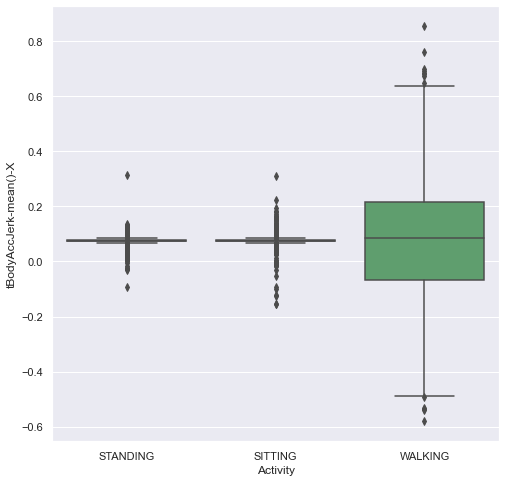

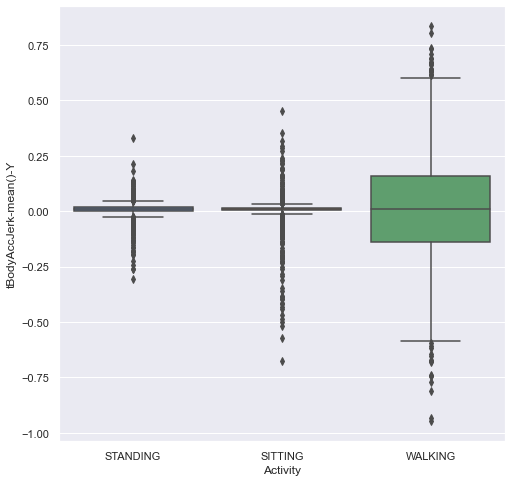

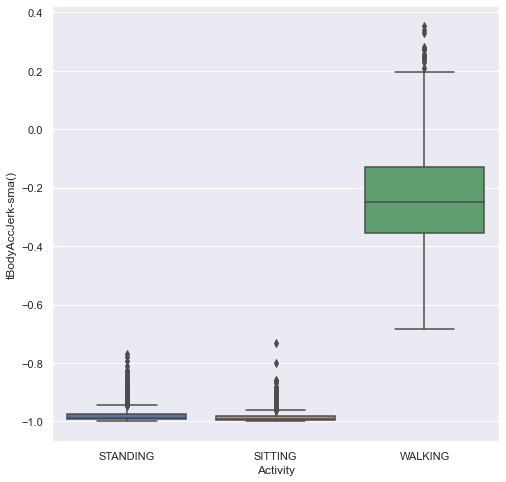

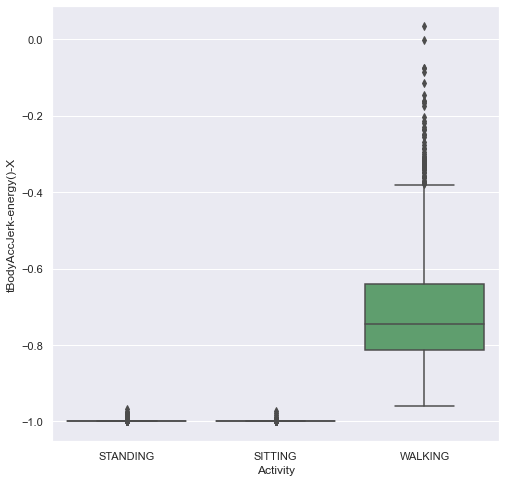

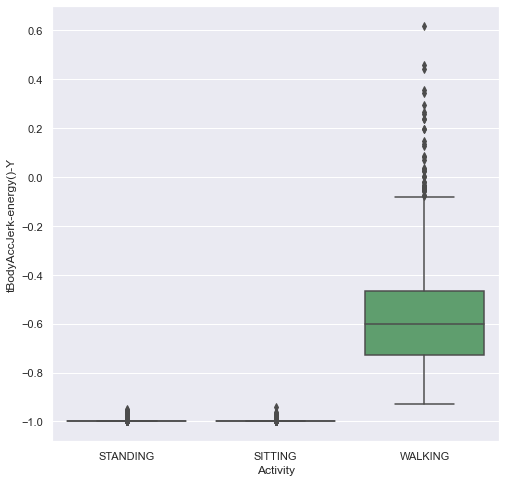

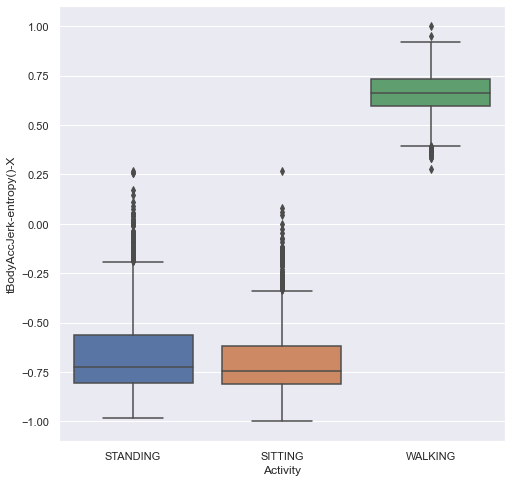

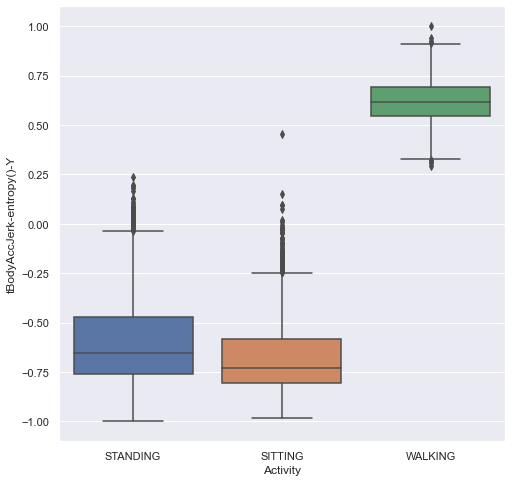

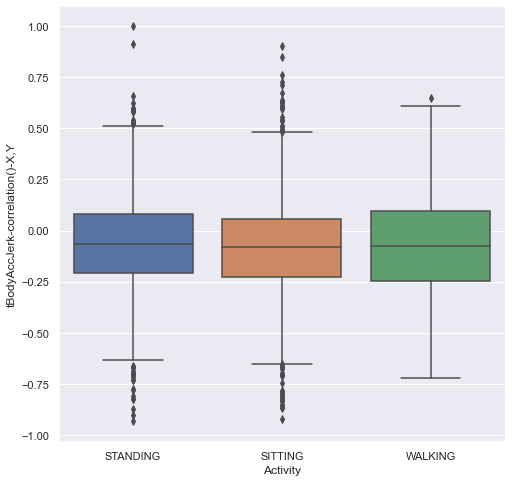

In [22]:
f = plt.figure(figsize = (8,8))
sb.boxplot(data=train_data, x='Activity', y='tBodyAccJerk-mean()-X')
f = plt.figure(figsize = (8,8))
sb.boxplot(data=train_data, x='Activity', y='tBodyAccJerk-mean()-Y')
f = plt.figure(figsize = (8,8))
sb.boxplot(data=train_data, x='Activity', y='tBodyAccJerk-sma()')
f = plt.figure(figsize = (8,8))
sb.boxplot(data=train_data, x='Activity', y='tBodyAccJerk-energy()-X')
f = plt.figure(figsize = (8,8))
sb.boxplot(data=train_data, x='Activity', y='tBodyAccJerk-energy()-Y')
f = plt.figure(figsize = (8,8))
sb.boxplot(data=train_data, x='Activity', y='tBodyAccJerk-entropy()-X')
f = plt.figure(figsize = (8,8))
sb.boxplot(data=train_data, x='Activity', y='tBodyAccJerk-entropy()-Y')
f = plt.figure(figsize = (8,8))
sb.boxplot(data=train_data, x='Activity', y='tBodyAccJerk-correlation()-X,Y')

We will compute the boxplots for fBodyAcc:

<AxesSubplot:xlabel='Activity', ylabel='fBodyAcc-entropy()-Y'>

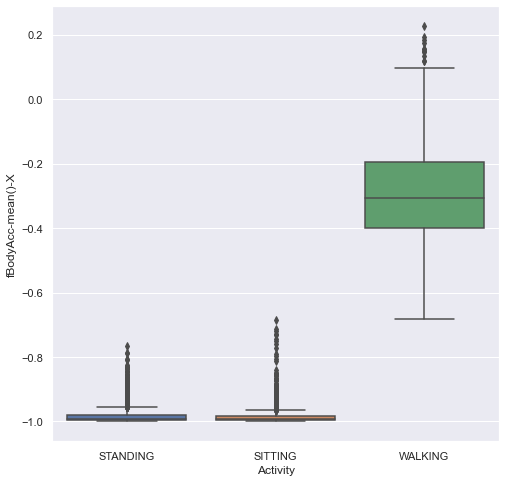

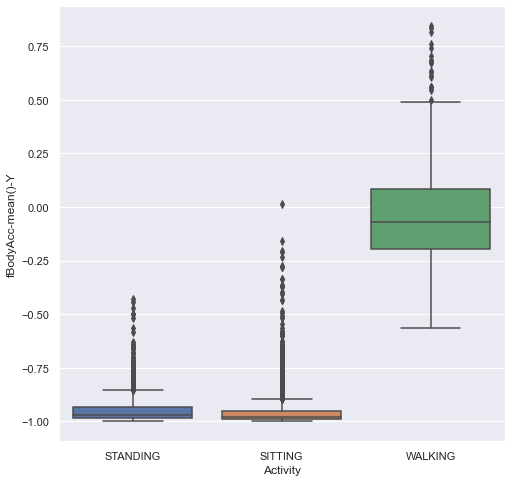

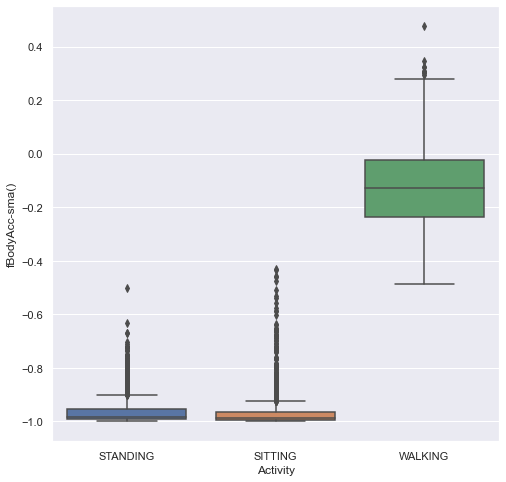

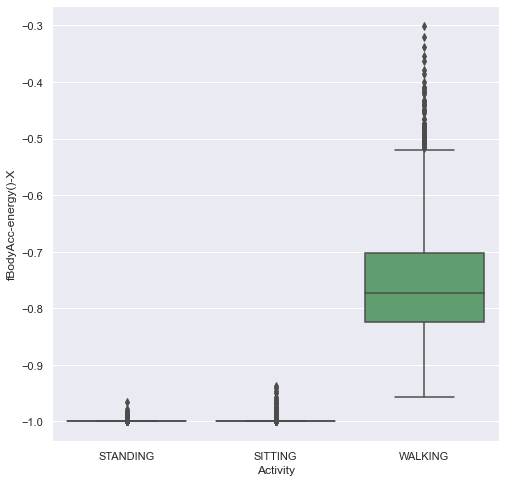

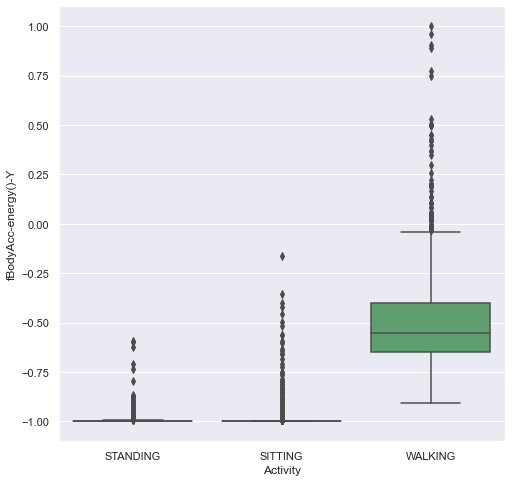

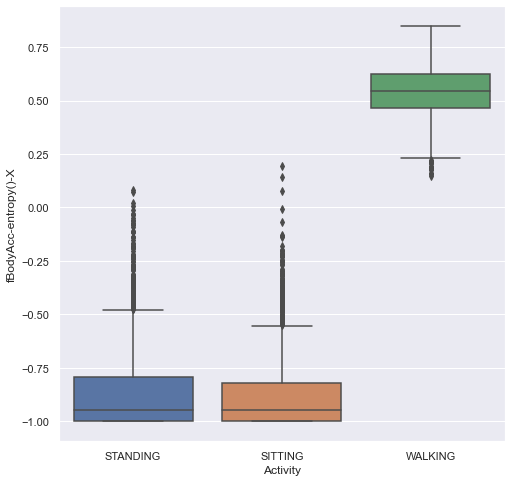

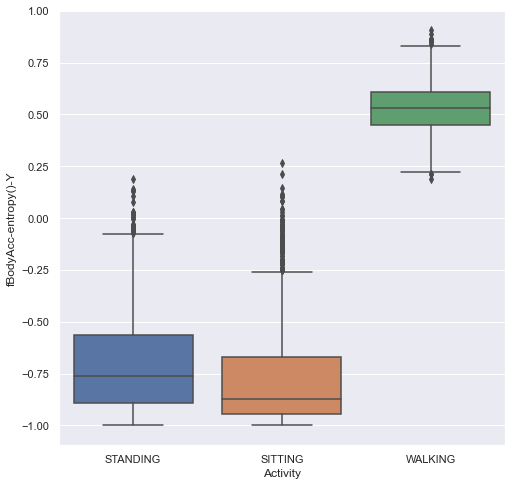

In [23]:
f = plt.figure(figsize = (8,8))
sb.boxplot(data=train_data, x='Activity', y='fBodyAcc-mean()-X')
f = plt.figure(figsize = (8,8))
sb.boxplot(data=train_data, x='Activity', y='fBodyAcc-mean()-Y')
f = plt.figure(figsize = (8,8))
sb.boxplot(data=train_data, x='Activity', y='fBodyAcc-sma()')
f = plt.figure(figsize = (8,8))
sb.boxplot(data=train_data, x='Activity', y='fBodyAcc-energy()-X')
f = plt.figure(figsize = (8,8))
sb.boxplot(data=train_data, x='Activity', y='fBodyAcc-energy()-Y')
f = plt.figure(figsize = (8,8))
sb.boxplot(data=train_data, x='Activity', y='fBodyAcc-entropy()-X')
f = plt.figure(figsize = (8,8))
sb.boxplot(data=train_data, x='Activity', y='fBodyAcc-entropy()-Y')

---
The reason we computed boxplots on a few signals (3 signals), is to explain and show a general trend in the boxplots, and hence justify why the box plot method isn't accurate enough, even though there is some potential in classification.<br> If we were to observe the boxplots above, some of the problems that could be clearly seen are:<br>
<br>
--> Too many outliers for each class of variables in the dataset<br>
--> The iqr is very small, and most of the data lies outside of the iqr<br>
--> The boxplots for two or more categories are very close to each other, and have the same positioning in relative to the y-axis. Moreover, such boxplots have no difference in y-axis positioning to be able to determine a relationship between the variable+signal and the class of 'Activity' accurately.
--> Many outliers from one class of data overlaps one (or more) other classes of data. For example, in certain box plots, there are many outliers in the data classified as 'SITTING' which overlaps data that is classified as 'WALKING' or 'STANDING'. As a result, overlaps can lead to misclassifications, and hence reduced accuracy.
<br>
<br>Whilst that being said, a few of the advantages are:<br>
--> Certain box plots for particular variables+signals is able to distinguish the 'WALKING' activity clearly from the 'STANDING' and 'SITTING' activity, with minimal number of overlaps from other classifications of data. This is intuitive as the activities of 'WALKING' is distinguishingly identifiable from 'STANDING' and 'SITTING'
--> We can make use of outlier data in our boxplots to either remove them, if there are a few outliers, or find a way to incorporate them if there are too many outliers, by using some form of data transformation.
<br>
<br>This explains why there is some potential in classification of the 'WALKING' activity when we make use of the boxplot method. However, as the problems highlight, boxplots of individual signals and their computed variables is a very inefficient method due to the multiple outliers from each classification of data that causes overlaps, and because of how the boxplots isnt able to distinguish the classes of activities. 
<br>
<br>When putting together the drawbacks and advantages, we are pointing in the direction of using the information from all the signals and their variables in some way, to improve the accuracy of the prediction, but also not overfit the train_data by using a bulk of the variables. So we don't want to use all the variables, but only want the info from all these variables, and reduce the ACTUAL number of predictor variables to use in our problem statement. This points us in the direction of Principal Component Analysis (PCA), which we will look at next.

---
### Start of PCA
Principal Component Analysis, in layman's terms, is an efficient data analysis technique that is able to reduce the dimensionality of the dataset (which in our case is the number of predictor variables), to a few dimensions, while preserving the valuable information of each predictor variable/dimension in the dataset. Now, we shall look at how to do the PCA on our dataset, as follows:

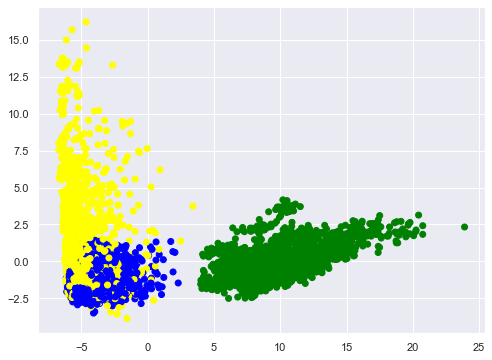

In [25]:
# Drop the 'Activity variable before performing the PCA'
x = train_data.drop('Activity',axis=1)

# Libraries used to scale the dataset, due to many outliers, as we saw in the box plots.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_data = scaler.transform(x)

# Library used to perform the PCA
from sklearn.decomposition import PCA

# Doing PCA on 2 components, which means reducing our dataset to have only 2 predictor variables
pca = PCA(n_components=2) 
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
scaled_data.shape
x_pca.shape

# Define a dictionary to map activity labels to colors
colors = {
    'STANDING': 'blue',
    'WALKING': 'green',
    'SITTING' : 'yellow'
    # Add more activity labels and corresponding colors here
}

y = train_data['Activity'].map(colors)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=y)

As we can see from the PCA plot above, the use of this technique is able to significantly reduce the dimension of the dataset and preserve information, and hence the ability to be able to cluster similar groups of data together. As we can see, the PCA is able to identify the 'WALKING' data separately from the 'SITTING' and 'STANDING' data. While there is much greater ability to distinguish between 'SITTING' and 'STANDING' data from the use of PCA, we can still see that there is some overlap of the 'SITTING' data points and the 'STANDING' data points. We cannot conlcude that it is optimal to reduce the dimensionality of the data to 2 components as a result.<br>
<br>
Hence, we shall look at the cumulative explained variance of using different numbers of components, which is essentially looking at the accuracy of using a particular number of components, while trying different numbers. We set a cut-off accuracy of '95%', as it indicates that using that many components can lead to a high accuracy, while at the same time avoiding the problem of overfitting as we ignore the component number that leads to an accuracy of greater than 95%. 

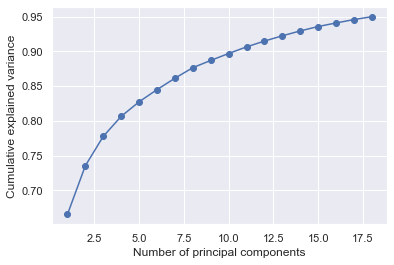

In [26]:
unscaled_x = train_data.drop('Activity',axis=1)

pca2 = PCA(n_components=18)
pca2.fit(unscaled_x)

# Compute the cumulative explained variance
cumulative_var = np.cumsum(pca2.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.plot(range(1, 19), cumulative_var, '-o')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

Here is a more detailed explanation of the cumulative explained variance:<br>
<br>
In PCA (Principal Component Analysis), the cumulative explained variance is the sum of the explained variance ratios of all the principal components up to a certain component. The explained variance ratio of a principal component is the proportion of the total variance in the data that is explained by that component.<br>
<br>
For example, if we have a dataset with 10 features and we perform PCA to reduce it to 5 principal components, the cumulative explained variance after the first component is the explained variance ratio of the first component, after the second component is the sum of the explained variance ratios of the first and second components, after the third component is the sum of the explained variance ratios of the first, second and third components, and so on.<br>
<br>
A higher cumulative explained variance is better because it indicates that a larger proportion of the total variance in the data is being explained by the principal components. This means that the reduced-dimensional data obtained from PCA retains more of the original variance in the data, and therefore preserves more of the important information in the data.<br>
<br>
Higher cumulative explained variance also means that the principal components are more representative of the original data and capture more of the underlying patterns and structures in the data. This can be useful for exploratory data analysis, visualization, and feature selection.<br>
<br>
However, it's important to note that a higher cumulative explained variance also means a higher number of principal components, which can increase the dimensionality of the reduced data and potentially introduce overfitting. Therefore, it's important to strike a balance between the amount of variance retained and the dimensionality of the reduced data, based on the specific problem you are trying to solve and the available computational resources.<br>
<br>
To strike this balance efficiently, we use the number of components that leads to a '95%' accuracy.

### We see that at n = 18, we are able to hit a cumulative explained variance of 0.95, which is good enough because the higher variance will mean that that we are preserving more of the important information in the data which will help to predict the Activities accurately. 

### While that being said, it may seem that hitting a cumulative explained variance of 1.00 may be even more accurate, it could possibly lead to overfitting because of too much dimensionality, as a result, we set the optimal cut-off of 0.95 for the cumulative explained variance

Using n=18 components in our PCA as it is the optimal number of components to use

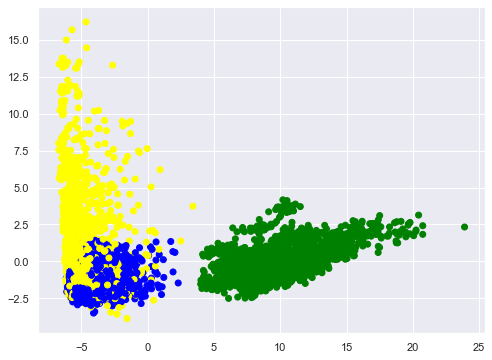

In [27]:
x_train = train_data.drop('Activity',axis=1)


scaler_train = StandardScaler()
scaler_train.fit(x_train)
scaled_data_train = scaler_train.transform(x_train)


pca_train = PCA(n_components=18)
pca_train.fit(scaled_data_train)
x_pca_train = pca_train.transform(scaled_data_train)

# Define a dictionary to map activity labels to colors
colors = {
    'STANDING': 'blue',
    'WALKING': 'green',
    'SITTING' : 'yellow'
    # Add more activity labels and corresponding colors here
}

y = train_data['Activity'].map(colors)

plt.figure(figsize=(8,6))
plt.scatter(x_pca_train[:,0],x_pca_train[:,1], c=y) #We are only plotting two components out of 18 components

The x_pca_train variable from above contains the 18 components and their values, for each row/record in the train_data. These values are determined from the original train_data set that had much more predictor variables.

In [28]:
x_pca_train.shape

(5405, 18)

Hence, the x_pca_train will be our new "predictor" variables (meaning that we have 18 predictor variables), and we will be using these to predict the 'Activity' variable accurately.

In [29]:
# Creating dataframes for the train data, to contain the predictor variables and the response variable
x_df_train = pd.DataFrame(x_pca_train)
y_df_train = pd.DataFrame(list(train_data['Activity']))

In [30]:
x_df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-4.848931,-1.978591,-0.337134,-0.075923,0.293315,-0.301470,-0.433629,-0.399300,0.145106,-0.676310,-0.166136,-0.335455,-0.086348,1.170467,-0.892968,0.632861,-0.925104,0.474356
1,-5.165134,-1.040293,0.744867,0.904728,-0.512603,-0.790882,-0.998540,-0.873310,-0.274656,-0.328063,0.333786,-0.401410,-0.045782,0.740613,-0.686088,-0.466832,-0.942873,0.760545
2,-5.233805,-1.225452,-0.407495,1.415026,-0.783636,-0.932272,-0.766034,-0.286474,-0.126735,-0.169006,0.009091,-0.456806,0.077949,-0.323552,0.106162,0.306120,-0.626557,-0.298321
3,-5.903049,-0.382104,0.833285,2.957457,-1.474862,-0.952382,-0.070346,-0.983822,0.159992,-0.478886,-0.289808,-0.366365,-0.419236,-0.369656,-0.434245,-0.089158,-1.174040,0.406506
4,-5.708455,-0.900754,0.481197,2.239621,-1.003381,-0.600966,0.667377,-0.087047,0.381077,-0.138093,0.272467,-0.778124,-0.417853,-0.354009,-0.097541,0.262851,-0.362446,0.220359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5400,7.842051,-1.026220,-0.281593,1.309640,1.853805,0.829183,-0.298456,0.697304,-1.165602,-0.015840,-0.301601,-0.626065,-1.133825,-1.055214,-0.156590,-0.303946,-0.403564,-2.664823
5401,8.067283,-0.640395,0.104854,2.328593,1.431494,-0.170500,-0.782233,0.500180,-1.695103,-1.754544,0.356425,-0.334466,-0.936394,-2.467749,-0.388510,-0.362648,0.523663,-1.515397
5402,7.541823,-0.412686,1.020240,1.849291,0.948390,-0.646437,-0.269123,-0.695889,-1.454328,-0.717692,-1.117513,0.177338,0.158994,-1.921043,-0.751829,-0.553564,1.722980,0.431619
5403,6.949799,-1.225216,0.101001,-0.203054,1.849627,-0.448858,-0.419390,-0.189476,0.309331,-0.995382,-0.283192,1.274921,0.722456,-1.661358,0.355828,-0.803617,1.454741,0.190264


In [31]:
y_df_train

,0
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING
...,...
5400,WALKING
5401,WALKING
5402,WALKING
5403,WALKING


As we have seen that PCA is useful in transforming our data during the Exploratory Data Analysis stage, we will be using the transformed data and feed it into the Machine Learning models, which can possibly lead to a higher accuracy compared to using the variables themselves. Hence, our x_variables will be the x_df_train and the y_variable will be the y_df_train. We shall now move on to stage 3, which is the machine learning process.

# Stage 3: Machine Learning
---
Using the preprocessed and transformed data (x_df_train and y_df_train) that we derived from Stage 2: EDA, we will make use of various machine learning models to help us solve our problem statement, and shall briefly discuss which models are more accurate and why. We shall try to understand the insights from each model that we gained, and present these insights in Stage 4.

---
### Model 1: Looking at the Decision Tree Classifier Model
We start off with using the classic decision tree that we learned from the course. We will do the train_test split before fitting the decision tree to the train data, and then predicting the accuracy of the decision tree on the train and test data sets.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9143844066123858

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8705621301775148



<AxesSubplot:>

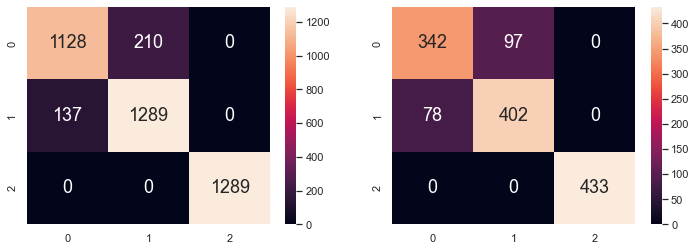

In [37]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(x_df_train, y_df_train, test_size = 0.25)


# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 7)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

As we can see from above, we get an accuracy on train dataset of 91% and an accuracy on test dataset of 87%. These accuracies are high, which mean that this decision tree is able to solve our problem statement with accuracy. Moreover, the closeness of the train and test accuracy is also a good indicator that the decision tree doesn't overfit on the train dataset.<br>
<br>
We did some trial and error testing here and determined that the decision tree had an optimal depth of 7, because for using max_depth of more than 7, we found that the accuracy on train dataset would continue to increase as the depths increase, while the accuracy on test dataset would stay roughly the same, slightly increase, and then would start to drop. This kind of behaviour of varying accuracy between the train and test dataset for max depth of more than 7 is an indicator that the decision tree starts to overfit the train data and perform badly on the test data when we use a max_depth of more than 7.<br>
<br>
Hence, we shall stick to max_depth = 7. Let us plot the trained decision tree that we obtained from the code above:

[Text(0.7939082278481012, 0.9375, '0 <= 3.713\ngini = 0.666\nsamples = 4053\nvalue = [1338, 1426, 1289]\nclass = SITTING'),
 Text(0.6511075949367089, 0.8125, '1 <= 0.473\ngini = 0.499\nsamples = 2763\nvalue = [1337, 1426, 0]\nclass = SITTING'),
 Text(0.40348101265822783, 0.6875, '5 <= 0.209\ngini = 0.445\nsamples = 2079\nvalue = [695, 1384, 0]\nclass = SITTING'),
 Text(0.20253164556962025, 0.5625, '6 <= -0.719\ngini = 0.352\nsamples = 1397\nvalue = [319, 1078, 0]\nclass = SITTING'),
 Text(0.10126582278481013, 0.4375, '11 <= 0.163\ngini = 0.5\nsamples = 260\nvalue = [130, 130, 0]\nclass = STANDING'),
 Text(0.05063291139240506, 0.3125, '1 <= -0.648\ngini = 0.455\nsamples = 143\nvalue = [93, 50, 0]\nclass = STANDING'),
 Text(0.02531645569620253, 0.1875, '17 <= 0.098\ngini = 0.497\nsamples = 96\nvalue = [52, 44, 0]\nclass = STANDING'),
 Text(0.012658227848101266, 0.0625, 'gini = 0.408\nsamples = 56\nvalue = [40, 16, 0]\nclass = STANDING'),
 Text(0.0379746835443038, 0.0625, 'gini = 0.42\nsa

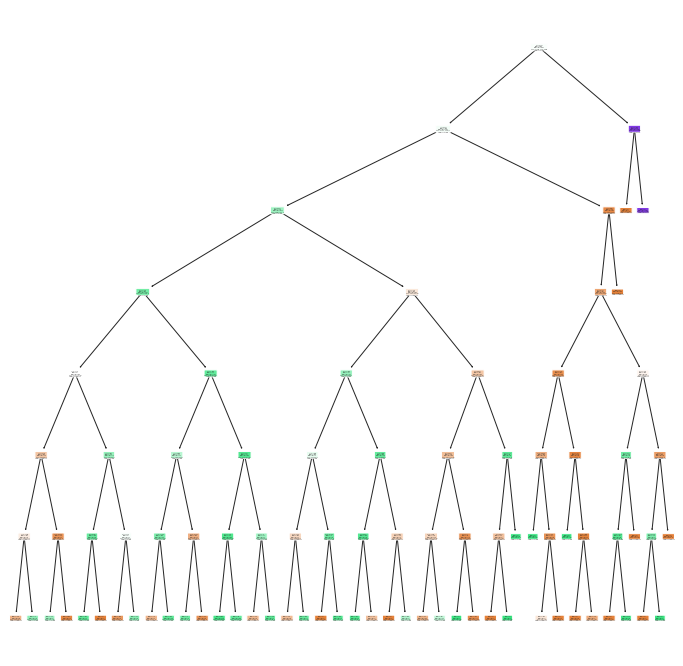

In [38]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=x_df_train.columns, 
          class_names=['STANDING', 'SITTING', 'WALKING'])

While the use of the classical decision tree model shows us that we can achieve up to 87% on test data, let us see whether we are able to improve this accuracy any further, by the use of other machine learning models. If we are not able to do so, then we can say that decision tree seems to be the most accurate in predicting activities, when we are given a set of signals, and after we do PCA on those signals before fitting the decision tree.

---
### Model 2: Looking at KMeans Model
We shall now look at the use of another Machine Learning Model, namely KMeans, and see how the model trained by KMeans performs on the test data. For efficient comparability and for relevancy, we shall use the same train and test data we generated from the decision tree above, and use it as the same train and test data set for other models, which helps us to efficiently compare the accuracies of the different models, due to the fact that the train and test data doesn't change.

We cannot use a particular number of clusters for the KMeans without determining that it is the optimal number of clusters. To determine the optimal number of clusters we shall look at 'wcss', or 'sum of the squared distance between each member of the cluster and its centroid'. For an optimal number of clusters, we would look at the point in the graph that has a sort of an 'elbow' or 'kink', and use the particular number of clusters that leads to this 'elbow' or 'kink'

In [39]:
# Doing the KMeans for the data
from sklearn.cluster import KMeans
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(X_train)
    wcss.append(kmeans_pca.inertia_)

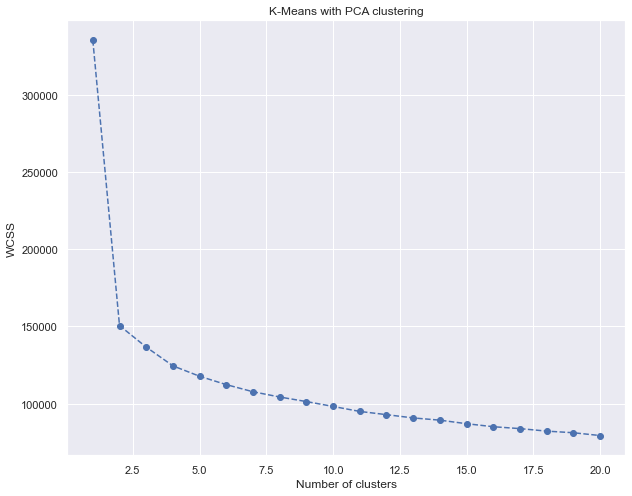

In [40]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('K-Means with PCA clustering')
plt.show()

We can see that there is an 'elbow' or 'kink' in the graph at the point of using 2/3 number of clusters for the KMeans Model. As our train dataset has 3 classes to be predicted for the response variable, we shall make use of 3 clusters.

In [41]:
# Optimal number of clusters is 2 or 3 --> use 3 because we have 3 variables in our dataset
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_pca.fit(X_train)

KMeans(n_clusters=3, random_state=42)

In [42]:
# Here we add the train data, the result that we got from using segment K-means PCA, and the Activity
# The segment K-means PCA can be seen as the encoded activity that is predicted by KMeans
# The Activity is the actual activity of the person/record/row in the dataset
df_segm_pca_kmeans = X_train
df_segm_pca_kmeans['Segment K-means PCA'] = list(pd.DataFrame(kmeans_pca.labels_)[0])
df_segm_pca_kmeans['Activity'] = list(y_train[0])
df_segm_pca_kmeans

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Segment K-means PCA,Activity
4827,11.265227,-0.164358,0.390388,-0.833200,0.315960,-3.254378,3.362653,-1.104406,0.289906,-1.710717,3.738917,0.609161,1.962964,-0.124354,1.212914,-1.164903,-0.118527,0.367218,1,WALKING
43,-5.721394,2.435718,0.673664,-0.241966,-1.455300,0.052768,-0.468796,0.044456,1.151590,-0.396292,-0.186919,-1.947680,0.042537,-0.235460,0.629684,0.088724,0.919799,-0.133727,0,SITTING
4992,-5.867770,-1.661435,0.294746,-0.291783,-2.451565,0.282431,0.118848,0.785951,0.869828,0.308429,0.400652,-1.222778,-0.242919,-0.171889,0.159013,-0.161143,-0.009401,-0.140343,2,SITTING
1246,-5.326541,-0.200359,-4.742822,-0.104633,0.866172,-0.206579,0.650719,0.157637,0.469813,0.267920,0.479517,-0.971706,0.900560,0.166799,-0.285032,0.676635,0.446272,-0.209900,2,STANDING
4116,6.144565,-1.461608,1.873836,-2.701186,1.082710,-1.229015,1.614140,1.548492,0.963751,0.003101,-1.806464,-0.956030,0.794015,-0.894196,-0.309946,-1.384071,0.031313,0.620386,1,WALKING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,-4.758644,4.876690,2.426173,1.924205,1.741475,-0.180461,-1.795904,-1.330486,0.089830,-0.043546,-0.412345,0.285758,1.779483,1.496774,-0.817992,-0.145523,-0.192924,0.277436,0,SITTING
2382,14.591360,1.009170,1.044768,0.334241,-2.331668,-3.829767,-0.835236,-0.706675,-0.074917,-1.674104,1.037958,-1.493294,-2.965961,0.113202,-1.589305,0.839737,0.478678,-1.609868,1,WALKING
4156,-2.066564,6.237612,1.850637,-1.513996,4.345171,0.137810,-5.687117,-2.209600,3.077171,2.947422,1.237280,-0.497161,3.871926,-2.600077,3.757261,4.216844,0.168479,0.076751,0,SITTING
616,-0.165215,-2.347222,0.015560,-0.428943,2.699491,0.500779,-0.124232,-0.937503,-0.503420,-0.870735,-0.551338,0.231080,0.189346,-0.254332,0.112597,-0.740725,1.028656,0.060062,2,STANDING


The cluster ID of 2 = STANDING and cluster ID of 1 = WALKING, so cluster ID of 0 = SITTING. This is determined from the order in which the KMeans classified the result into the category of '0', '1' or '2', which is the encoded activities. We shall now add a 'Segment' to map these encoded activities to the activities themselves, and then view the resulting dataframe.

In [43]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'SITTING',
                                                                              1: 'WALKING',
                                                                              2: 'STANDING'})
df_segm_pca_kmeans

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,Segment K-means PCA,Activity,Segment
4827,11.265227,-0.164358,0.390388,-0.833200,0.315960,-3.254378,3.362653,-1.104406,0.289906,-1.710717,...,0.609161,1.962964,-0.124354,1.212914,-1.164903,-0.118527,0.367218,1,WALKING,WALKING
43,-5.721394,2.435718,0.673664,-0.241966,-1.455300,0.052768,-0.468796,0.044456,1.151590,-0.396292,...,-1.947680,0.042537,-0.235460,0.629684,0.088724,0.919799,-0.133727,0,SITTING,SITTING
4992,-5.867770,-1.661435,0.294746,-0.291783,-2.451565,0.282431,0.118848,0.785951,0.869828,0.308429,...,-1.222778,-0.242919,-0.171889,0.159013,-0.161143,-0.009401,-0.140343,2,SITTING,STANDING
1246,-5.326541,-0.200359,-4.742822,-0.104633,0.866172,-0.206579,0.650719,0.157637,0.469813,0.267920,...,-0.971706,0.900560,0.166799,-0.285032,0.676635,0.446272,-0.209900,2,STANDING,STANDING
4116,6.144565,-1.461608,1.873836,-2.701186,1.082710,-1.229015,1.614140,1.548492,0.963751,0.003101,...,-0.956030,0.794015,-0.894196,-0.309946,-1.384071,0.031313,0.620386,1,WALKING,WALKING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,-4.758644,4.876690,2.426173,1.924205,1.741475,-0.180461,-1.795904,-1.330486,0.089830,-0.043546,...,0.285758,1.779483,1.496774,-0.817992,-0.145523,-0.192924,0.277436,0,SITTING,SITTING
2382,14.591360,1.009170,1.044768,0.334241,-2.331668,-3.829767,-0.835236,-0.706675,-0.074917,-1.674104,...,-1.493294,-2.965961,0.113202,-1.589305,0.839737,0.478678,-1.609868,1,WALKING,WALKING
4156,-2.066564,6.237612,1.850637,-1.513996,4.345171,0.137810,-5.687117,-2.209600,3.077171,2.947422,...,-0.497161,3.871926,-2.600077,3.757261,4.216844,0.168479,0.076751,0,SITTING,SITTING
616,-0.165215,-2.347222,0.015560,-0.428943,2.699491,0.500779,-0.124232,-0.937503,-0.503420,-0.870735,...,0.231080,0.189346,-0.254332,0.112597,-0.740725,1.028656,0.060062,2,STANDING,STANDING


We shall now look at how KMeans performed on our train data

In [45]:
correct = 0
for i in range(len(df_segm_pca_kmeans)):
    if df_segm_pca_kmeans['Activity'].iloc[i] == df_segm_pca_kmeans['Segment'].iloc[i]:
        correct += 1
print("Number of correct predictions is:", correct)
print("Accuracy on train data is:", correct/len(df_segm_pca_kmeans))

Number of correct predictions is: 3199
Accuracy on train data is: 0.7892918825561313


This accuracy on train data set is worse than what we got from using the classic decision tree, suggesting that it is not a good idea to use the KMeans model and that it doesn't improve the accuracy on prediction. Nevertheless, let us look at the accuracy of KMeans on the test data as well.

In [62]:
test_prediction = kmeans_pca.predict(X_test)

In [63]:
test_prediction_activity = []
for i in range(len(test_prediction)):
    if test_prediction[i] == 0:
        test_prediction_activity.append('SITTING')
    elif test_prediction[i] == 1:
        test_prediction_activity.append('WALKING')
    elif test_prediction[i] == 2:
        test_prediction_activity.append('STANDING')

In [64]:
correct = 0
for i in range(len(test_prediction)):
    if test_prediction_activity[i] == list(y_test[0])[i]:
        correct += 1
print("Number of correct predictions is:", correct)
print("Accuracy on train data is:", correct/len(test_prediction))

Number of correct predictions is: 1062
Accuracy on train data is: 0.7855029585798816


While the accuracy on train data is very similar to that on test data, roughly being 79% rounded off, it shows that the use of KMeans model doesn't lead to overfitting, but that the kmeans model itself isn't accurate enough to solve our problem statement because of the accuracy being lower than 80%, while the accuracy from using the classical decision tree was over 90% on train data and 87% on test data roughly.

Let us visualize the result of using KMeans in the form of a scatterplot. The x_axis is component 0, while the y_axis is component 1. These are only two components out of the 18 components. While this remains the same when using KMeans, the color of the individual plotted points is the result of applying the KMeans model to these components, and it shows us how reliable KMeans can be in predicting the activites because of the observable distinguished clusters in the plot as can be seen below. However, note that there are overlapping green point plots hidden by the yellow point plots and vice versa, which is hidden in the plot itself, as it isn't clearly visible. These overlapping points are what lead us to the lower accuracy of the KMeans model itself.

/Users/manikandanpraveenkannappan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


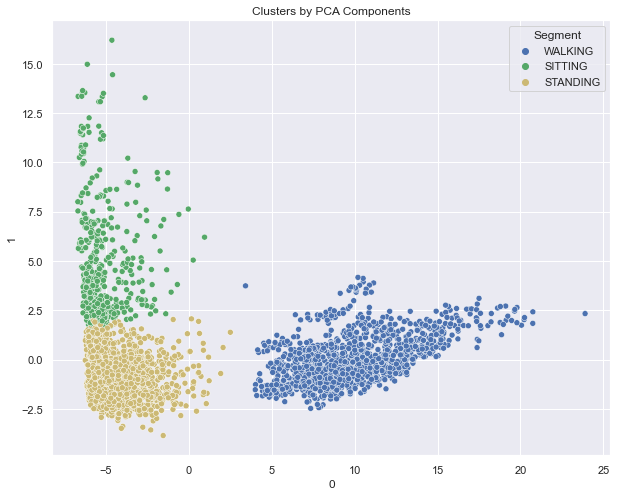

In [79]:
# Here, we visualise the result of using KMeans
import seaborn as sns
sns.set()
x_axis = X_train[0]
y_axis = X_train[1]
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = ['b', 'g', 'y'])
plt.title('Clusters by PCA Components')
plt.show() 

Since KMeans model is only able to yield accuracy of up to 78%, it is not effective enough in solving our problem statement, and hence, we shall look at another classification model, which could possibly improve the accuracy on predicting the activities of the person based on the 18 components derived from the variables originally.

---
### Model 3: Looking at Random Forest Classification Model
We shall now look at an even more sophisticated model, namely the Random Forest Classification, and apply it on our data, to see whether the model can yield a higher accuracy compared to the use of a regular classification decision tree.

In [103]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=8, random_state=0)
clf.fit(X_train.iloc[:,:18],y_train)

/var/folders/92/p4n90m016bx49bjjsd86vmhw0000gr/T/ipykernel_998/2465406240.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train.iloc[:,:18],y_train)


RandomForestClassifier(max_depth=8, random_state=0)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9444855662472242

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9023668639053254



<AxesSubplot:>

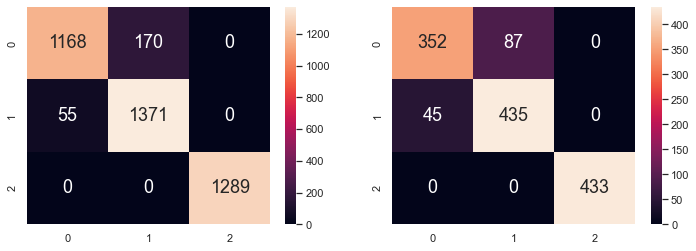

In [104]:
# Predict Activity corresponding to the 18 components
y_train_pred = clf.predict(X_train.iloc[:,:18])
y_test_pred = clf.predict(X_test.iloc[:,:18])

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", clf.score(X_train.iloc[:,:18], y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", clf.score(X_test.iloc[:,:18], y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

We can see that the use of the Random Forest Classification is able to achieve higher accuracy in comparison to the use of the regular classification decision tree as it improves the train accuracy to be up to 94%, whereas the test accuracy is improved to be up to 90%, which is greater than the train and test accuracies of 91% and 87% respectively, when making use of the regular classification decision tree.<br>
<br>
Hence, we have found a better model, namely the Random Forest Classification Model, which can help us to predict the classification of activites, achieving an accuracy of up to 90%, which is a significant improvement in comparison to the models we used earlier. But, is this the best model? Are there other models that can achieve an even higher accuracy?<br>
<br>
ON THAT NOTE, when we changed the 'max_depth' to be more than 8, we found that the model had a greater increase in accuracy of the train dataset, while the accuracy on the test dataset slowly increased towards 91%, having a maximum cap at around 91%, after which the accuracy on the test dataset started to decrease, suggesting overfitting. Hence, the optimal max_depth of 8 was derived from this process. Using a max_depth lower than 8 also wasn't optimal as it led to lower accuracy on both the train and test data set. 
<br>
So coming back to the question again, are there other models? While we can establish that we already have a model that can solve our problem statement quite accurately and help predict a person's activity, with an accuracy of 90% on test data, a higher accuracy is always desirable, as it always points to a better and higher chance of correctly predicting the activity that the person is doing. 
<br>
With that said, we shall finally look at Support Vector Machines, a model that could possibly improve our accuracy on test data set further. 

---
### Model 4: Looking at Support Vector Machine Model
We shall apply the same train and test data set on this model, and quickly see how much accuracy we are able to achieve on the train and test data set.

In [107]:
# Import Support Vector Machine
from sklearn.svm import SVC

# We shall choose the appropriate 'C' parameter for SVC by using GridSearchCV
param_grid = [
    {'C':[0.5,1,10,100],
     'gamma':['scale',1,0.1,0.01,0.001,0.0001],
     'kernel':['rbf']
    }
]

# Import the library to do GridSearchCV, and use it to find the optimal parameters
from sklearn.model_selection import GridSearchCV
optimal_param = GridSearchCV(
                SVC(),
                param_grid,
                cv = 3,
                scoring = 'accuracy',
                verbose = 0)
optimal_param.fit(X_train.iloc[:,:18],y_train[0])

# Print the optimal parameters to use for the Support Vector Machine Model
print(optimal_param.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


We can see that the ideal values are C = 10, and gamma = 'scale' which we shall use to train our SVC Model

In [108]:
svc = SVC(C=10,gamma='scale')
svc.fit(X_train.iloc[:,:18],y_train[0])

SVC(C=10)

After training our SVC model, let us look at how the SVC Model performs on the train and test data set.

In [109]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", svc.score(X_train.iloc[:,:18], y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", svc.score(X_test.iloc[:,:18], y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9373303725635331

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9252958579881657



This is a very significant improvement compared to our previous model on random forest classification!! So why is it significant and good, given that accuracy on train set actually had a slight decrease? Before we discuss this, let us recall the accuracies when we used the Random Forest Classification Model:<br>
#### Random Forest Classification Model Accuracies
#### Train data accuracy = 94.45% 
#### Test data accuracy = 90.24%
#### Support Vector Machine Model Accuracies
#### Train data accuracy = 93.37%
#### Test data accuracy = 92.53%
<br>
Now compare this to the accuracies on the Support Vector Machine. We notice that the train data accuracy has reduced by roughly 0.72% while the test data accuracy has increased by roughly 2.3%. Moreover, these changes led to the train and test data accuracies to be more closer to each other. In the field of machine learning, such an improvement is a direct indicator that the model has very low problems of overfitting because of the closeness in accuracy of the train and test data, which in the world of machine learning, is a very very good thing!<br>
<br>
It is good, because it means that future predictions is likely not to be overfitted to the train data set, and it also means that the model is able to generalize very well to test data, which suggests that the model is likely to perform well when deployed in the real world, when it predicts the activity of a person based on unseen data from the sensors, signals, and the variables computed on those signals, as was done in our dataset as well.
<br>
Now that we have looked at 4 models, we shall present their results in Stage 4, followed by our findings from these models, and a conclusion on how we have found an accurate solution to our problem statement, one that has the potential to be generalised when deployed to the real world, as a result of reduced overfitting. 

---
# Stage 4: Presentation of Insights and Recommendations

## Let us look at the 4 models we used with their accuracies and compare them:

### Model 1: Decision Tree Classifier (Train data accuracy = 91.44%, Test data accuracy = 87.06%)

### Model 2: KMeans (Train data accuracy = 78.93%, Test data accuracy = 78.55%)

### Model 3: Random Forest Classification (Train data accuracy = 94.45%, Test data accuracy = 90.24%)

### Model 4: Support Vector Machines (Train data accuracy = 93.37%, Test data accuracy = 92.53%)

### We will place emphasis when looking at the accuracy of models, by looking at the test data accuracy, since it gives an indication of how the model could perform when it is deployed in the real world, but nonetheless, this doesn't mean that the model is guaranteed to give the exact test accuracy when it is used in the real world. 

### When looking at the four models, looking at the test accuracies alone, model 4 outperforms models 1, 2, and 3 because of their low test accuracies. With that being said, the train data accuracy of model 4 is also very close to the test data accuracy, suggesting that the model has very little/minimal difference in overfitting, due to the closeness of the accuracies. As we discussed earlier, this is a big thing in machine learning as researchers are trying to find ways to improve the test accuracy while lowering the train accuracy, so that these values are closer to each other.

### With that being said, model 2 also seems to be attractive due to the extreme closeness in the train and test accuracies, however the model itself is not good enough because the overall accuracies is worse in comparison to other models such as model 1 and 3, hence model 2 would not perform so well when it is used in the real world context.

### As a result, we find that model 4 is significant enough, and would be able to perform generally well in comparison to other models in the real world context, because of the factors that we discussed earlier. Hence, we could consider model 4 to be a good solution to our problem statement. Notice that we had to first remove out irrelevant variables, do principal component analysis to retain the important information in the features while using less predictor variables to predict the activity, and then use the output of the principal component analysis as the input to determine which model accurately predicts the 'Activity' of a person accurately.